# Project 8: Global Mean Sea Level

<h1 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; top: 90px;right: 30px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" style="width:100px" />
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" style="width:100px" />
</h1>
<h2 style="height: 25px">
</h2>

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/): Week 2.4. Friday December 8, 2023.*

## Overview

In this project we will use time series analysis techniques to analyze real data on _global_ sea level (i.e., the data represents the average value over the entire globe). In particular, we will take into account seasonal effects of the time series in our analysis. Specifically, the tasks are:

- Tasks 1-2: as a warm up you will create and analyze some elementary noise + signals using AR(1)
- Tasks 3-5: explore sea level data, then reconstruct it using a linear trend and seasonality evaluated with a simple monthly average
- Task 6: evaluate frequency components of seasonality using least-squares harmonic estimation (LS-HE)
- Tasks 7-8: using the results from Task 6, apply BLUE and evaluate annualy rate of sea level rise
- Task 9: apply AR(3) and consider how to make a prediction (no prediction is actually made)

**Note that a only a subset of your answers here are required to be included in the `Report.md` file.**

## Global Mean Sea Level (GMSL) measurements

_The following text is provided to explain the GMSL data._

The Earth's temperature is rising due to the accumulation of greenhouse gases in the atmosphere, resulting in two inter-related consequences regarding sea-level rise. The direct consequence is the accelerated melting of polar ice sheets and glaciers. This leads to an expansion of seawater, contributing to the overall rise in sea levels. Additionally, as an indirect effect, the warming of oceans causes seawater to thermally expand, further worsening the rise in sea levels. The impact of sea-level rise is already evident in various parts of the world, presenting significant challenges to coastal communities and ecosystems. For example, coastal cities are particularly vulnerable due to their concentrated infrastructure and populations near shorelines (see below).

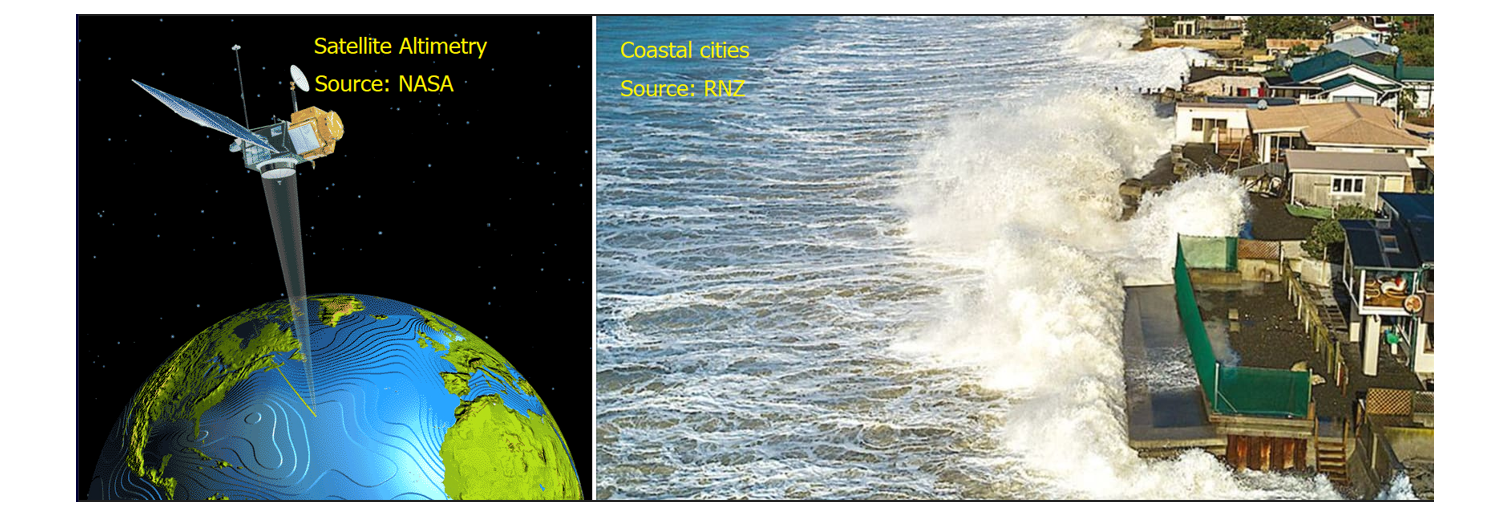

Satellite altimetry (SA) provides a powerful tool to monitor the global sea-level changes. It employs specific satellite missions equipped with altimeters to measure the distance between the satellite and the sea surface. This measurement relies on the travel time of signals, the time taken for a radar or laser pulse emitted from the satellite to reach the sea surface and then return to the satellite. In this context, we aim to analyze a specific dataset of SA information.

The data are the Global Mean Sea Level (GMSL) measurements made since 1993 until mid 2020 by satellite altimetry. It consists of a few satellite missions such as TOPEX/Poseidon (launched August, 1992), Jason-1 (launched December, 2001), Jason-2 (launched June, 2008) and Jason-3 (launched January 2016). The unit is in mm, and it shows a steady increase in GMSL of around 3.5 ± 0.4 mm/year over the above period. The details, along with the data, can be found [here](
https://www.cmar.csiro.au/sealevel/sl_hist_last_decades.html).

The goal of this project is to apply the Time Series Analysis theories presented in Week 2.4 to this time series. We just only use here data from 1993 Jan. to 2019 Dec. (so exactly 27 years).

In particular we are interested to identify the components of time series, check the stationarity of the time series, make statistical judgment whether the estimated trend in sea-level is significant (you may know that there are argues about climate change, sea level rise, and global warming), identify the appropriate functional model ($Y=\mathrm{Ax}+\epsilon$) and estimate the stochastic model parameters of the ARMA process.   

Most of the exercises in this notebook consist of both coding and answering (open) questions. Typically, as you work your way through the exercises, you can often re-use code, or part of it, from earlier exercises.

File needed for the exercise: `CSIRO_Alt_seas_inc.txt`

In [ ]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as signal
from statsmodels.graphics.tsaplots import plot_acf  
from scipy.stats import norm
from scipy.stats.distributions import chi2
%matplotlib inline

## Tasks 1-2: Simulated data with AR(1)

We intend to simulate (as a time series) 1000 samples at 1-second intervals (so $m=1000$), using a first-order auto-regressive AR(1) random process $s(t)$ as follows:

$$
S(t)
= \beta S(t-1)+e(t)
$$

with $t = 1, …, 1000$ and where $\beta=0.9$ is the given AR(1) parameter, and we further assume

$$
\mathbb{E}(S(t))=0 \text{,} \hspace{2mm} \mathbb{D}(S(t))=\sigma^2=1.
$$ 

Please note that, as a convention, for Time Series Analysis and Observation Theory $m$ represents the number of samples, which is represented as $N$ for the Signal Processing, so $m=N$.

You may simulate the data using a normal distribution. To do so, you will use the above recursive form, which needs initialization. To initialize the first data, you can use <code>S[0] = np.random.normal(...)</code> using the normal distribution. To use the above recursive formula you need to simulate $e(t)$, requiring to have its standard deviation $\sigma_{e}$ of the white noise process. It is given from the following equation:

$$
\sigma_{e} = \sigma \sqrt{(1-\beta^2)}.
$$

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1:</b>   

Create a synthetic time series and evaluate it by completing the following steps:
<ol>
    <li>Simulate and plot (versus time) the AR(1) time series based on the above-specified values. By the visual inspection, explain the time-correlated pattern of the simulated time series (i.e. describe what does it show, how does it look like; for example compared to white noise).</li>
    <li>Plot the normalized Auto-Covariance Function (ACF) of the generated time series. 
    <li>Plot the power spectral density (PSD)/periodogram of the generated time series. Repeat the simulation several times to see if you can observe a particular pattern in the PSD. Explain your observations.</li>
    <li>Take $\beta = 0$ to simulate a white noise process and repeat steps 1-3 (do not need to provide any 'plot' here). Compare the results with the case $\beta = 0.9$. In which case can you observe a flat PSD? 
</ol>
</p>
</div>

In [ ]:
# np.random.seed(0)  # For reproducibility

m = 1000
t = np.arange(1, m + 1)
Fs = 1.0

beta = YOUR_CODE_HERE
sigma = YOUR_CODE_HERE          
sigma_e = YOUR_CODE_HERE

s = np.zeros(m)
s[0] = np.random.normal(loc=0, scale=sigma, size=None)

for i in range(1, m):
    s[i] = YOUR_CODE_HERE

# Create the first plot (Time series data)
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.plot(YOUR_CODE_HERE, YOUR_CODE_HERE, '-', color='blue', label='signal')
plt.grid(True)
plt.box(True)
plt.xlabel('Time (sec)')
plt.ylabel('TS data: y(t)')
plt.title(f'Time series (beta = {beta:.2f})')
plt.legend()

# Calculate ACF
plot_acf(YOUR_CODE_HERE, lags=100, alpha=0.05, color = 'red')
plt.ylabel('Normalized ACF')
plt.xlabel('Lag (sec)')
plt.title(f'ACF (beta = {beta:.2f})')
plt.tight_layout()
plt.show()

# Calculate and plot power spectral density (PSD) of the generated signal
frequencies, psd = signal.periodogram(YOUR_CODE_HERE, fs=YOUR_CODE_HERE, scaling='density', return_onesided=False)

# Create the second plot (Power spectral density)
plt.figure(figsize=(8, 3))
plt.loglog(YOUR_CODE_HERE, YOUR_CODE_HERE, color='blue', label='psd')
plt.ylabel('Power: PSD')
plt.xlabel('Frequency (Hz)')
plt.title(f'Power Spectral Density (PSD) of the signal (beta = {beta:.2f})')
plt.legend()
plt.grid(True)
plt.box(True)
plt.ylim([1e-4, 1e3])

We now intend to simulate (as a time series) 1000 samples of a harmonic wave plus white noise, again at 1-second intervals. We take $m=1000$ and use the following equation (signal + noise):

$$
Y(t)=A\sin(2\pi ft + \theta)+S(t)
$$

where $S(t)$ is the white noise process of Task 1 $(\beta=0)$. The amplitude, initial phase and frequency of the sine wave are given as $A=1$, $\theta=\frac{\pi}{4}$, and $f=0.05$ Hz, respectively. 

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2:</b>  
 
It is required to:
	
<ol>
    <li>Plot the normalized Auto-Covariance Function (ACF) of the generated time series. What is the ACF of a sine wave?</li>
    <li>Plot the power spectral density (PSD)/periodogram of the generated time series.</li>
    <li>Increase $\sigma=1$ to $\sigma=10$ (increase noise) and repeat steps 1 and 2 (no plot needed here to present). Discuss your observations.</li>
</ol>
</p>
</div>



In [ ]:
m = 1000
t = np.arange(1, m + 1)
Fs = 1.0

beta = YOUR_CODE_HERE
sigma = YOUR_CODE_HERE
sigma_e = YOUR_CODE_HERE

A = 1
Theta = np.pi / 4
f = 0.05

s = np.zeros(m)
s[0] = np.random.randn(1)*sigma

for i in range(1, m):
    s[i] = YOUR_CODE_HERE

Y = YOUR_CODE_HERE

# Create the first plot (Time series data)
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.plot(YOUR_CODE_HERE, YOUR_CODE_HERE, '-', color='blue', label='signal')
plt.grid(True)
plt.box(True)
plt.xlabel('Time (sec)')
plt.ylabel('TS data: y(t)')
plt.title(f'Signal with $A$={A}, $\Theta$={Theta*180/np.pi:.1f}°, '
          f'$f$={f} Hz, $\sigma$={sigma}')
plt.legend()

# Calculate ACF
plot_acf(YOUR_CODE_HERE, lags=100, alpha=0.05, color = 'red')
plt.ylabel('Normalized ACF')
plt.xlabel('Lag (sec)')
plt.title(f'Auto-covariance (sigma={sigma})')
plt.tight_layout()
plt.show()

# Calculate and plot power spectral density (PSD) of the generated signal
frequencies, psd = signal.periodogram(YOUR_CODE_HERE, fs=YOUR_CODE_HERE, scaling='density',
                                      return_onesided=False)

# Create the second plot (Power spectral density)
plt.figure(figsize=(8, 3))
plt.loglog(YOUR_CODE_HERE, YOUR_CODE_HERE, color='blue', label='psd')
plt.ylabel('Power: PSD')
plt.xlabel('Frequency (Hz)')
plt.title(f'Power Spectral Density of the signal (sigma={sigma})')
plt.ylim([1e-3, 1e3])
plt.grid(True)
plt.box(True)
plt.legend()

## Tasks 3-5: exploration and (simple) reconstruction of sea level data

The descrition about the data is given above.

### Read and plot the data

The data consists of monthly global mean sea levels. We use exactly 27 years of monthly data, so $m=27\times 12=324$. 

We use the package pandas to import the data and do a bit of pre-processing. Once imported as a dataframe object, we the method `iloc` (integer-based indexing) toextract the time and sea level data as ndarrays. 

In [ ]:
dat = pd.read_csv('CSIRO_Alt_seas_inc.txt', names=['month','sl'])

noy = 27                                  # number of years
nom = 12                                  # months in a year
dat = dat.loc[0: nom*noy - 1]             # keep first 27 years of data
t0 = dat.iloc[:, 0] - dat.iloc[0, 0]      # create time-array
                                          # time relative to t0 [yr],
                                          # so t0[0] = 0
t1 = dat.iloc[:, 0]                       # time-array, original time instances
                                          # (so t1[0] = 1993.042)
m = len(dat)                              # number of observations
                                          # (m as the number of observations)
T = (t0[m - 1] - t0[0])*m / (m - 1)       # observation record length
                                          # (as N*dt; sample-and-hold convention)
dt = T/m                                  # Delta t [yr]
Y = dat.iloc[:,1]                         # observed sea-level height                

# plot observed time-series, as it is, versus epoch-time in [year]
plt.plot(t1, Y, color='red', label='sea level')
plt.xlabel('Time [yr]')
plt.ylabel('Global mean sea level [mm]')
plt.title('Global Mean Sea-Level (GMSL)')
plt.grid()
plt.legend()

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3:</b>   

For this Task, the objective is to visually analyze the trend pattern of the global mean sea level height data. While these pattern is apparent through a visual inspection of the data, we intend to enhance clarity by applying some straightforward and simple measures. Specifically, you will compute the annual mean by averaging the twelve monthly values for each of the twenty-seven years under consideration. It is therefore asked to:

<ol>
    <li>Calculate yearly averages (for 12 months of a year calculate its mean and take that mean value for all months). This can result in an array of  (<code>y_mean_array</code>) 324 entries, which is indeed based on only 27 annual means. </li>
    <li>Plot the original data and the yearly averaged data in a single figure.</li>
    <li>Based on your visual inspection, do you conclude that the sea-level rises in this plot? If so, what is your initial estimate of sea level rise (i.e., just a rough estimate using the plot only; no need to use code!)? Report your estimate in units of mm/yr.</li>
</ol>
</p>
</div>

<div style="background-color:#C8FFFF; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Hint for Tasks 3-5:</b>   


You may want to use either the matrix form <code>y_mat</code> or the vector form <code>y</code>, depending on the question asked, to will see which one is more convenient. For example, to compute the mean over rows or columns of the matrix, for a given matrix M you may use <code>M.mean(axis=1)</code> or <code>M.mean(axis=0)</code>: check the difference; or to repeat arrays using <code>np.repeat(a, repeats, axis=0)</code>, and <code>np.tile(a, repeats)</code>: check the difference.

Read the documentation for more information: <code>[np.repeat](https://numpy.org/doc/stable/reference/generated/numpy.repeat.html)</code> and <code>[np.tile](https://numpy.org/doc/stable/reference/generated/numpy.tile.html)</code>.
</p>
</div>

In [ ]:
Y_mat = np.reshape(Y.values, (noy,nom))

Y_mean = YOUR_CODE_HERE

Y_mean_array = YOUR_CODE_HERE

plt.figure(figsize=(8,4))
plt.plot(YOUR_CODE_HERE, YOUR_CODE_HERE,'r-', label='Monthly')
plt.plot(YOUR_CODE_HERE, YOUR_CODE_HERE,'b.', label='Annual mean')
plt.legend()
plt.grid()
plt.title('Original and mean values (averaged over months)')
plt.xlabel('Time [yr]')
plt.ylabel('Global mean sea level [mm]')

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 4:</b>  
 
In this Task you investigate the seasonality (monthly variations of sea-levels). For every individual year, you have already calculated the mean sea level. You can now subtract it from the original monthly values of that year (so showing the deviation from the mean value of that particular year). This process yields the specific year's seasonal variations, consequently centering them around a zero mean. Subsequently, you determine the average magnitude of these seasonal variations across the span of 27 years. It is then required to:

<ol>
    <li>Calculate/plot an array containing 324 entries derived from subtracting the yearly averages (<code>y_mean_array</code>) from the original observations y (seasonality variations over all 27 years).
    <li>Calculate/plot the average seasonal sea-level variations over 12 months of the year (so 12 values in total, averaged over 27 years). For simplicity, you may need to reshape the previous array to a matrix form first.</li>
    <li>Compute the difference between the maximum and minimum values of the averaged seasonalities of the sea levels.</li>
    <li>Explain why we would expect to have such seasonal variations in GMSL.</li>
    <li>Compute/plot an array (<code>m_mean_array</code>) that contains the above 12 seasonal values (repeated and therefore identical for all 27 years), making in total 324 entries.</li>
    
</ol>
</p>
</div>

In [ ]:
# calculate average of different months of a year
all_seasonality = YOUR_CODE_HERE
plt.figure(figsize=(16,4))
plt.plot(YOUR_CODE_HERE, YOUR_CODE_HERE, 'b-o', label='average')
plt.title('Seasonal variations (over all years)')
plt.xlabel('Year')
plt.ylabel('Seasonal variations [mm]')
plt.legend()
plt.grid()

all_seasonality_mat = np.reshape(all_seasonality.values, (27,12))
m_mean = YOUR_CODE_HERE

# create x-axis from January (1) to December (12)
months = YOUR_CODE_HERE

# plot average of different months of a year
plt.figure(figsize=(8,4))
plt.plot(YOUR_CODE_HERE, YOUR_CODE_HERE, 'b-o', label='average')
plt.title('Seasonal variations (in a year)')
plt.xlabel('Month of year')
plt.ylabel('Global mean sea level [mm]')
plt.legend()
plt.grid()

# create array with monthly average of each month repeated 27 times
m_mean_array = np.tile(YOUR_CODE_HERE, 27)
plt.figure(figsize=(16,4))
plt.plot(YOUR_CODE_HERE, YOUR_CODE_HERE, 'b-o', label='average')
plt.title('Average seasonal variations over 27 years')
plt.xlabel('Year')
plt.ylabel('Average seasonal variations [mm]')
plt.legend()
plt.grid()

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 5:</b>   

We have a total of $m=12\times 27=324$ monthly samples. The aim of this Task is to reconstruct the original dataset while utilizing a reduced amount of information (parameters). To achieve this, you exclusively employ the 27 mean annual values and 12 mean seasonal values, resulting in a combined count of $27+12=39$ values. To generate the data for a specific year, you combine/add the annual mean of that year with the set of 12 zero-mean seasonal values. This, for example, can be linked to array <code>y_mean_array</code> and <code>m_mean_array</code>. It is required to:
<ol>
    <li>Reconstruct the 324 samples using the above-mentioned $27+12=39$ values (<code>recon_y</code>).</li>
    <li>Plot the original and reconstructed data in a single figure, and compare the results.</li>
    <li>Plot the difference between the original and reconstructed data: <code>y-recon_y</code> (residuals). Do you see a trend in the residuals?</li>
</ol>
</p>
</div>

In [ ]:
plt.figure(figsize=(8,5))

plt.plot(t1, YOUR_CODE_HERE, 'r-',
         label='before reconstruction')

recon_Y = YOUR_CODE_HERE
plt.plot(t1, recon_Y, 'b-',
         label='after reconstruction')

plt.plot(t1, YOUR_CODE_HERE, 'g-',
         label='difference')

plt.title('Reconstructed data')
plt.xlabel('time [yr]')
plt.ylabel('Global mean sea level [mm]')
plt.legend()
plt.grid()

## Task 6: Least-squares harmonic estimation (LS-HE)

In this task we rely on concepts from Sensing and Observation Theory as well as Signal Processing: the least-squares harmonic estimation (LS-HE) method utilizes hypothesis testing and hence making a power spectral density (PSD) to **identify the most statistically significant frequency components in a time series.**

Previously we have used the FFT PSD, which is a special case of LS-HE. There are several advantages of LS-HE over FFT PSD: as a generalized form of the FFT PSD, LS-HE is limited neither to evenly spaced data nor to integer frequencies. With LS-HE, we may in addition include the following terms in the PSD estimation:

1. the linear trend $Y=\mathrm{Ax}$, as an already available deterministic part of the model, and
2. the covariance matrix $\Sigma_{Y}$, as a stochastic part of the model.


In the function `LS-HE(A,Y,t,sigma)` we consider $\Sigma_{Y}=\sigma^2 I$ to ba a scaled identity matrix.  

<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px"> <p>

<b>Python function for model identification using LS-HE (detection of seasonality)</b>

<em>Note: it is optional to follow all steps here, but it is important to be able to use the function</em> <code>LSHE(A,Y,t,sigma)</code>.

Least Squares Harmonic Estimation (LS-HE) uses hypothesis testing to compute the Power Spectral Density (PSD). The goal is to detect any potential seasonality (or periodic pattern) in the time series $Y$. An alternative has already been obtained from DFT and periodogram (Week 2.3 on Signal Processing). This is a generalization of the DFT formulation, with an initial design matrix $\mathrm{A}$ available. We will simplify the test statistic $T_{q=2}$ to be able to implement and use it here in LS-HE function.

<b>Implementation of $T_{q=2}$ test statistics</b>
    
Considering 

$$
\Sigma_{\hat \epsilon}=  \Sigma_Y - A (A^T \Sigma_Y^{-1} A)^{-1} A^T
$$

If we assume $\Sigma_Y=\sigma^2 I$, we then have

$$
 T_q =\hat \epsilon^T C(C^T  \Sigma_{\hat \epsilon} C)^{-1} C^T  \hat \epsilon
$$

The following function <code>LSHE(A,Y,t,sigma)</code> is an implementation of the above formula.
</p></div>

In [ ]:
def LSHE(A, Y, t, sigma):
    """
    Least squares harmonic estimation (LS-HE),
    by AR Amiri-Simkooei, CCJM Tiberius, PJG Teunissen.
    Assessment of noise in GPS coordinate time series:
      methodology and results,
      J. of Geophy. Res.: Solid Earth 112 (B7)
    Here we assume the variance matrix of observation is
      Sigma_Y = sigma^2*I, a scalled identity matrix.
     
    INPUT:
          A: the initial design matrix
          y: the vector of observations
          t: time instances of observations, assuming t[0]=0
          sigma: the standard deviation of observations in
                 Sigma_Y = sigma**2*I

    OUTPUT:
           P: the periods at which PSDs are calculated
           F: the frequencies at which PSDs are calculated
           PSD: the power spectral density calculated at P or F
    """
    m, n = np.shape(A)

    # Generating a series of periods to be tested
    # starting period (just above the Nyquist period)
    P = np.ones(10**6)*2.001*(t[1] - t[0])

    # the maximum period to be tested
    Pmax = 2*(t[m - 1] - t[0])

    i = 0
    while P[i]<Pmax:
        # to make sure that we check all possible frequencies/periods
        P[i+1] = P[i]*(1 + 0.1*P[i]/Pmax)    
        i = i + 1

    # Keep the periods from the minimum to the maximum tested period 
    P = P[0:i] 

    # Computing frequencies from the periods
    F = 1 / P

    # mt number of frequencies/periods to be tested
    mt = len(F)
    AtAinv = np.linalg.inv(A.T @ A)
    Aty = A.T @ Y
    xhat = AtAinv @ Aty
    eps_hat = Y - A @ xhat
    PSD= np.zeros(mt)
    C = np.zeros((len(t),2))
    for j in np.arange(0,mt):
        wt = 2 * np.pi * F[j] * t  
        C[:,0] = np.cos(wt)
        C[:,1] = np.sin(wt)
        CtA = C.T @ A
        MAT = C.T @ C - CtA @ AtAinv @ CtA.T
        CtE = C.T @ eps_hat
        PSD[j] = CtE.T @ np.linalg.inv(MAT) @ CtE
    PSD = PSD / sigma**2
    
    return P, F, PSD 

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 6:</b> 

To identify the seasonality signal, LS-HE requires an initial design matrix $\mathrm{A}$ and some other input. In time series analysis, the functional model is usually based on the linear regression model $Y(t)=y_0 + r t$. From this model, you can make the initial $Y=\mathrm{Ax}+\epsilon$ linear model, where $\mathrm{A}$ is the $m\times 2$ design matrix (see Weeks 1.2 and 1.3), and $\mathrm{x}=[y_0, r]^T$ is the vector of two unknown parameters. For this application the standard deviation of data is assumed to be $\sigma= 4$ mm. It is required to:

<ol>
    <li>Establish an initial $m\times 2$ design matrix based on $t_0$ (see above for the definition of $t_0$).</li>
    <li>Use the required input for the function <code>LSHE</code> to compute/plot the PSD of the GMSL time series (plot versus frequency).</li>
    <li>Identify the first three important periodic signals (3 highest peaks) in the PSD. Determine the frequencies (in cycle/year) of the detected peaks: $f_1=?$, $f_2=?$ and $f_3=?$. Explain possible causes for the detected signals.</li>
    <li>Test if the 3 identified signals are statistically significant in $1-\alpha=0.999$ confidence level.</li>
</ol>
</p>
</div>

<div style="background-color:#facb8e; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px; width: 95%"> <p>Note: once you create the plot, you should be able to identify three peaks, where you will need 2 decimals of precision for the peak with the lowest frequency (the other two peaks can be reported as integers). The following code may help you identify the values.</p></div>

```
vector_1 = np.array([0, 1, 2, 3, 4, 5, 6])
vector_2 = np.array([10, 11, 12, 13, 14, 15, 16])
use_these_indices = np.where((vector_1>1) & (vector_1<6) & (vector_2>12))
print(vector_1[use_these_indices])
```

In [ ]:
A0 = YOUR_CODE_HERE
sigma = YOUR_CODE_HERE
Sigma_Y = YOUR_CODE_HERE
Sigma_Y_inv = np.linalg.inv(Sigma_Y)

P, F, PSD = YOUR_CODE_HERE
plt.figure()
plt.plot(YOUR_CODE_HERE, YOUR_CODE_HERE, color='b', label='psd')

# the chi-squared test shows that annual and semi-annual signals
# are statistically significant (alpha = 0.001)
plt.axhline(chi2.ppf(YOUR_CODE_HERE, df=YOUR_CODE_HERE), linestyle='--',
            color='r', label='confidence level')
plt.xlabel('Frequency [cycle/year]')
plt.ylabel('PSD: test statistics $T_q$')
plt.title('$T_q$ test statistics')
plt.grid()
plt.legend()
#plt.xlim([0.02, 0.06])
f1 = 1
f2 = 2
f3 = 0.04

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 7:</b>   

This Task applies the best linear unbiased estimation (BLUE) to estimate and test the rate $r$ for sea-level rise based on the initial model $y(t)=y_0 + r t$, with the three identified seasonal signals included. Each detected signal can represent a particular sine wave as: $a \cos 2 \pi f t + b \sin 2 \pi f t$ (see Chapter on Components of Time Series). You then need to make the final functional model $Y=\mathrm{Ax}+\epsilon$, with $\mathrm{A}$ being an $m \times 8$ matrix. Having the linear model $Y=\mathrm{Ax}+\epsilon$ along with the covariance matrix of observations $\Sigma_Y=\sigma^2 I$, $\sigma = 4$ mm, you can estimate the BLUEs of $x$ (unknowns), $y$ (observations) and $e$ (residuals): $\hat{X}=(A^T \Sigma_Y^{-1}A)^{-1}A^T \Sigma_Y^{-1}y$, $\hat{Y}=A \hat{x}$, and $\hat{\epsilon}=Y-\hat{Y}$. Further you can estimate the covariance matrix of $\hat{X}$: $\Sigma_{\hat{X}}=(A^T \Sigma_Y^{-1}A)^{-1}$. It is required to:

<ol>
    <li>Establish the linear model of observation equations $Y=\mathrm{Ax}+\epsilon$ with $m\times 8$ design matrix $\mathrm{A}$.</li>
    <li>Explain the unknown elements of $x=[x_1,...,x_8]^T$.</li>
    <li>Obtain the BLUE of $x$ and its covariance matrix $\Sigma_{\hat{X}}$, and also the BLUE of $Y$ and $\epsilon$: $\hat{Y}$ and $\hat{\epsilon}$ along with their covariance matrices.</li>
    <li>Plot the original data $Y$, the estimated $\hat{Y}=\mathrm{A\hat{X}} $, the estimated trend (from columns 1 and 2 of $\mathrm{A}$, which is $\mathrm{A_1}$), and the estimated seasonality (from columns 3-8 of $\mathrm{A}$, which is $\mathrm{A_2}$). $\textbf{Hint:}$ To separate the trend from seasonality note that if $\mathrm{A}=[\mathrm{A_1,A_2}]$ is partitioned column-wise and $x=[x_1^T, x_2^T]^T$ is partitioned row-wise, we then have $\hat{Y}=\mathrm{A\hat{X}} = \mathrm{A_1\hat{X_1} + A_2\hat{X_2}} = \hat{Y}_1 + \hat{Y}_2$.</li>
    <li>What is the total amplitude of the combined annual + semi-annual signals?</li>
</ol>
</p>
</div>

In [ ]:
A = YOUR_CODE_HERE # Note: there are many ways to do this;
                   #   and you will need more than one line

# BLUE estimate of x
Xhat = YOUR_CODE_HERE

# covariance matrix of xhat
Sigma_Xhat = YOUR_CODE_HERE

# BLUE estimate of y
Yhat = YOUR_CODE_HERE

# covariance matrix of yhat
Sigma_Yhat = YOUR_CODE_HERE

# BLUE estimate of e (residuals)
eps_hat = YOUR_CODE_HERE

# covariance matrix of eps_hat
Qeps_hat = YOUR_CODE_HERE

# separate the seasonality and trend (third-order polynomial)
yhat_trend = YOUR_CODE_HERE
yhat_season = YOUR_CODE_HERE

plt.figure()
plt.plot(t1, Y,'b', label='Original')
plt.plot(t1, Yhat,'r',label='Least squares fit')
plt.plot(t1, yhat_trend,'k--', label='Trend')
plt.plot(t1, yhat_season,'k-', label='Seasonality')
plt.xlabel('Time [year]')
plt.ylabel('Time series value [mm]')
plt.title('Original, LS fit and seasonality of the signal')
plt.legend()

Depending on how you have formulated the entries  of $x=[x_1,...,x_8]^T$, one of $x_i$'s, $i=1,...,8$ is the rate $r$ for sea-level rise (assume $x_j=r$). We then need to determine $\hat{x}_j=\hat{r}$, and its standard deviation $\sigma_{\hat{x}_j}=\sigma_{\hat{r}}$. Based on the information provided, we need to decide if the estimated sea-level rise is statistically significant. The test can be performed using the statistical significance test given in Weeks 1.3 and 1.4 (Sensing and Observation Theory). Two hypotheses are put forward: Null hypothesis $H_0$: $r=0$ versus alternative hypothesis $H_a$: $r\neq 0$. We need to test the null hypothesis versus the alternative one. This can be done by two different but equivalent forms from duality between 'confidence intervals' and 'hypothesis tests'. We can obtain a confidence interval by inverting a hypothesis test, and vice versa. 

##### Duality between 'confidence intervals' and 'hypothesis tests' (make your own choice for the next Task)
In the first scenario, we may make a 'confidence interval' around the estimated $\hat{r}$ for $r$. This is performed as follows:
$$
 \hat{r} - z_{\frac{\alpha}{2}}\, \sigma_{\hat{r}} \le   r   \le \hat{r} + z_{\frac{\alpha}{2}}\, \sigma_{\hat{r}}
$$
where $z_{\frac{\alpha}{2}}$ is the critical value obtained from the Standard Normal Distribution in a given significance level $\alpha$. If the reference value specified as $r=0$ in $H_0$ lies inside the above interval, we can reject the null hypothesis. By a few simple operations, the above confidence internal can be inverted to make a 'hypothesis test' as follows (second scenario): 
$$
r  - z_{\frac{\alpha}{2}}\, \sigma_{\hat{r}} \le   \hat{r}   \le   r + z_{\frac{\alpha}{2}}\, \sigma_{\hat{r}}
$$
which accepts the null hypothesis if $\hat{r}$ lies in the above interval.

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 8:</b>   

<ol>
    <li> Use $\hat{X}$ and its covariance matrix $\Sigma_{\hat{x}}$ to determine the BLUE estimate for the sea level rate (r) and its precision. What are the values?</li>
    <li>Determine a 99.9% confidence interval for the unknown rate, assuming the original observations are normally distributed (first scenario). You can alternatively also apply/use the second scenario.</li>
    <li>If the null hypothesis states that 'the rate for sea level rise is not statistically significant', do you accept or reject the null hypothesis?</li>
</ol> 
</p>
</div>

In [ ]:
YOUR_CODE_HERE

After detrending the observations denoted as $Y$, our next step involves addressing the residuals $\hat{\epsilon}$, where $\hat{\epsilon} = Y - A\hat{X}$. By eliminating the linear trend $\mathrm{Ax}$ from the original time series $Y$, the resulting residuals are expected to exhibit stationarity. While statistical tests are available to determine whether a time series is stationary, we choose for a visual inspection in this context. For a sationary time series $\hat{\epsilon}$, we calculate its normalized auto-covariance function (ACF). Various methods can be employed to compute the ACF of a time series using <code>plot_acf</code> from <code>statsmodels</code>.

The temporal correlation within $\hat{\epsilon}$ provides insights into the temporal dependencies among residual entries, thereby offering a valuable tool for prediction. 

<div style="background-color:#AABAB2; color: black; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 9:</b>   

In the context of prediction (although we will not implement prediction in this project), it is essential to identify the type of random process represented by the residuals, which follow an ARMA(p,q) model. For this exercise, we assume an ARMA(3,0)=AR(3) model, implying that we set p=3 and q=0. A Python function is provided (see below), which is designed to estimate the parameters of an AR(p) process ($\beta_1,...,\beta_p$). This function will subsequently be used for the AR(3) process by setting $p=3$. It is required to:

<ol>
    <li>Plot the BLUE residulas of the fitted (detrended) model. Is it now a stationary time series (just by visual inspection)?</li>
    <li>Plot the normalized auto-covariance function (ACF) of the residuals $\hat{\epsilon}$.</li>
    <li>Check the given function <code>AR_estimation</code>, which estimate the AR(p) parameters and its standard deviation.</li>
    <li>Use the function <code>AR_estimation</code> to estimate the three parameters $\beta_1$, $\beta_2$ and $\beta_3$ of AR(3) of the residuals $\hat{\epsilon}$. Please provide the three parameters of the AR(3) along with their standard deviations.</li>
    <li>Explain how you can use the information obtained from the functional model $Y=\mathrm{Ax}$ and stochastic model AR(3) to predict sea-level for the coming year (you do not need to do the actual prediction).</li>
</ol>
</p>
</div>

In [ ]:
def AR_estimation(S, p):
    """
    This function computes the AR(p) parameters beta_1,...,beta_p 
    for an AR(p) process Y (stationary S: for example epsilon hat).
    
    INPUT:
        S: m x 1 observations (time series)
        p: order of AR
    OUTPUT:
        Beta: Parameters Beta
        S_Beta: Standard deviation of Beta 
        Sigma_e: Standard deviation of white noise 
    """
    m = len(S)
    # make the design matrix
    A = np.zeros((m-p, p))
    for i in range(1, p+1):
        A[:,i-1] = S[p-i:m-i]

    # removing the first p data from s
    S = S[p:m]
    m, p = A.shape

    # least squares estimate of Beta
    Beta = np.linalg.inv(A.T @ A) @ A.T @ S

    # least squares estimate of residuals (white noise)
    Ehat = S - A @ Beta

    # estimation of variance of data (white noise)
    Sig2 = (Ehat.T @ Ehat) / (m - p)

    # covariance matrix of Beta
    Sigma_Beta = Sig2 * np.linalg.inv(A.T @ A)

    # standard deviation of Beta
    std_Beta = np.sqrt(np.diag(Sigma_Beta))

    # standard deviation of white noise
    Sigma_e = np.sqrt(Sig2)
    
    return Beta, std_Beta, Sigma_e

In [ ]:
YOUR_CODE_HERE

**End of notebook.**
<h2 style="height: 60px">
</h2>
<h3 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; bottom: 60px; right: 50px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">
      <img alt="Creative Commons License" style="border-width:; width:88px; height:auto; padding-top:10px" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png"/>
    </a>
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png"/>
    </a>
    
</h3>
<span style="font-size: 75%">
&copy; Copyright 2023 <a rel="MUDE Team" href="https://studiegids.tudelft.nl/a101_displayCourse.do?course_id=65595">MUDE Teaching Team</a> TU Delft. This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.